# Mezclador activo.

El mezclador pasivo más utilizado es el mezclador de diodo doble balanceado. 
Su rango dinámico, figura de ruido moderada y buen rendimiento general lo convierten en una opción popular. 
Sin embargo, es imposible evitar su pérdida de conversión. 
Aquí es donde entran en juego los mezcladores activos. 
No solo pueden proporcionar ganancia, sino que también necesitan menos potencia de accionamiento LO para funcionar. 

Cubrir cada arquitectura de mezclador activo no sería muy útil, solo hay dos formas en que los dispositivos activos se pueden usar para crear un mezclador: por acción de conmutación como en el mezclador de diodo doble balanceado, o explotando la no linealidad de un dispositivo activo para aproximar la multiplicación.


## Mezclador empleando un JFET


![ex 2.13](fig/jfet_basic.png)

Si bien es probable que sea el circuito más simple de construir, cómo es capaz de multiplicar señales no es nada intuitivo. Este es uno de los pocos mezcladores activos que realmente no depende de la conmutación, sino que explota la característica no lineal de un JFET. 
El análisis del circuito revelará cómo exactamente este circuito puede multiplicar señales.

Primero, recordemos la ecuación característica de un JFET, que vincula el voltaje de la puerta-fuente con la corriente de drenaje de salida, donde la respuesta de corriente para un JFET de respuesta cuadratica es:

$i_{D}(t) = I_{DSS} \cdot (1 - \frac{v_{GS}(t)}{V_c})^2$   

Donde:

$i_{D}(t)$ siendo la corriente de drenaje de salida

$i_{DSS}$ siendo la corriente de saturación JFET

$v_{GS}(t) = v_G(t) - v_S(t)$

$V_c$ siendo el voltaje de corte del JFET.

En este circuito, la señal de RF se aplica en el Gate, mientras que la señal LO se aplica en Source. 


Sea la señal RF 

$v_{RF}(t) = V_{RF} cos(2 \pi f_{RF} t)$ 

y la señal LO 

$v_{LO}(t) = V_{SS} + V_{OL} cos(2 \pi f_{OL} t)$. 

El voltaje Gate-Source se convierte en:

$v_{GS}(t) = v_{RF} - v_ {LO}  = V_{RF} cos(2 \pi f_{RF} t) - V_{GG} - V_{OL} cos(2 \pi f_{OL} t)$


Reemplazando $v_ {GS}$ en la ecuación con la expresión anterior, obtenemos:


$i_{D}(t) = I_{DSS} \cdot (1 - \frac{v_{GS}(t)}{V_c})^2$   

Desarrollando el cuadrado

$(1-\frac{v_{GS}(t)}{V_c})^2 = 1 - 2 \frac{v_{GS}(t)}{V_c} + (\frac{v_{GS}(t)}{V_c})^2$

$v_{GS}(t)= (v_{RF} - v_{OL})^2 = v_{RF}^2  - 2 v_{RF} v_{OL} + v_{OL}^2$



$(1-\frac{v_{GS}(t)}{V_c})^2 = 1 - 2 \frac{v_{RF} - v_{OL}}{V_c} + \frac{v_{RF}^2  - 2 v_{RF} v_{OL} + v_{OL}^2}{V_c^2}$

Entonces 

$i_{D}(t) = I_{DSS} \cdot (1 -  \frac{2 v_{RF}}{V_c} + \frac{2 v_{OL}}{V_c} + \frac{v_{RF}^2}{V_c^2}  - \frac{2 v_{RF} v_{OL}}{V_c^2} + \frac{v_{OL}^2}{V_c^2})$

Observe el último término de la expresión anterior se observa el temino de la muestra

$I_{DSS} \frac{2 v_{RF} v_{OL}}{V_c^2}$

Veamos con qué frecuencias terminamos:



$i_{D}(t) = I_{DSS} \cdot (1+ \frac{2 v_{OL}}{V_c}+ \frac{v_{OL}^2}{V_c^2}  -  \frac{2}{V_c} v_{RF} - \frac{2  v_{OL}}{V_c^2} v_{RF} + \frac{1}{V_c^2} v_{RF}^2   )$


Por lo tanto, nuestra corriente de drenaje de salida consta de las siguientes frecuencias:

$f_{RF}$

$f_{OL}$

$2 f_{RF}$

$2 f_{OL}$

$f_{RF} - f_{OL}$

$f_{RF} + f_{OL}$

Nuestra frecuencia deseada son $f_{RF} - f_{OL}$ o $f_{RF} + f_{OL}$. 

Independientemente de cuál se desee, las otras frecuencias no deseadas están muy lejos y, por lo tanto, se pueden filtrar.

Este circuito JFET y sus matemáticas subyacentes forman la base de los mezcladores JFET. Muchos mezcladores JFET prácticos son simplemente variaciones de este.


## Ejemplo, ejercicio mezclador JFET

La figura muestra el circuito de un mezclador  a FET y el circuito equivalente del elemento activo. 


![5-cuatrocientos](fig/mezclador_jfet_2N3819.png)


Datos de los mismos son:

$V_{rf}$ : sinusoide pura con $Vpico= 10 mV$ y frecuencia $10 MHz$. 

$r_{rf} = 1 Kohm$.

$V_{ol}$: sinusoide pura con $V_{pico}= 1 V$ y frecuencia $11 MHz$.

$r_{OL} = 1 Kohm$.


Los capacitores de acople CA son cortocircuitos a todas las frecuencias de interés. 

Los elementos reactivos no tienen pérdidas.


$L_1/C_1$ resuenan a $10 MHz$.

$L_2/C_2$ resuenan a $11 MHz$.

$L_3/C_3$ resuenan a $1 MHz$.

$R_L= 50 Kohms$ 



El FET puede considerarse cuadrático con $I_{dss}= 12 mA$ y  $V_c=-3V$.

$I_d = I_{dss} (1 - \frac{v_{gs}}{v_c})^2$

$Y_{in}(10MHz) = j \omega 20\times10^{-12}$ 

$Y_{out}(1MHz) = 4\times 10^{-6} S $ 


Determinar:

1. RS para $i_{DQ}= 3 mA$
2. Calcular $i_{DQ}$ (teniendo  en cuenta que $v_{RF}$ tiene una variación pequeña)
3. Calcular $gm$ y $gm_c$
4. Valor pico de la componente de VRL en $1 MHz$
5. Valor pico de la componente de VRL en $10 MHz$
6. Valor pico de la componente de VRL en $11 MHz$
7. Valor pico de la componente de VRL en $20 MHz$
8. Valor pico de la componente de VRL en $21 MHz$
9. Valor pico de la componente de VRL en $22 MHz$


![5-cuatrocientos](fig/mezclador_jfet_modelo.png)

## 1. RS para $I_{dq}= 3 mA$


La respuesta de corriente para un FET de respuesta cuadratica 

$$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$$

Despejando 

$$V_{GS} = V_P \cdot (\sqrt{\frac{I_{dq}}{I_{DSS} }} + 1)$$

$$V_{GS} = -3V \cdot (-\sqrt{\frac{3 mA}{12 mA}} + 1)$$

$$V_{GS} = -1.5 V$$

Si $V_G = 0V$

$$V_S = 1.5 V$$

$$V_S = I_{ds} \cdot R_S$$

$$R_S = \frac{V_S}{I_{ds}} = \frac{1.5 V}{3 mA} = 500 \Omega$$




## 2.   Corriente $I_d$ dada las variaciones de $v_{OL}$

Para simplificar el analisis, suponemos que la admitancia de entrada $Y_{in}=0$

Por lo tanto, la tension de gate es igual a $v_{RF}$ y la tensión de source es igual a $v_{OL}$

Ademas, suponemos que las variaciones de $v_{RF}$ no afectan al punto de operación del dispositivo.

En el siguiente analisis supondremos que $v_{RF} = 0$

De la respuesta cuadratica del FET

$$i_{DQ}(t) = I_{DSS} \cdot (1 - \frac{v_{GS}(t)}{V_c})^2$$

Operando

$$i_{DQ}(t) =  I_{DSS} \cdot (1- \frac{2 v_{GS}(t)}{V_c}+ \frac{v_{GS}(t)^2}{V_c^2}) $$

Remplazando por $v_{GSQ}(t) = - V_{SS}  - v_{OL}(t)$

$$i_{DQ}(t) =  I_{DSS} \cdot (1- \frac{2 (- V_{SS}  - v_{OL}(t))}{V_c}+ \frac{(- V_{SS}  - v_{OL}(t))^2}{V_c^2}) $$

$$i_{DQ}(t) =  I_{DSS} \cdot (1+ \frac{2 V_{SS}}{V_c}  +  \frac{2 v_{OL}(t)}{V_c} + \frac{1}{V_c^2}( V_{SS}^2  + 2 V_{SS} v_{OL}(t) + v_{OL}(t)^2) $$


$$i_{DQ}(t) =  I_{DSS} \cdot ( (1+ \frac{2 V_{SS}}{V_c} + \frac{V_{SS}^2}{V_c^2})  +  (\frac{2}{V_c} + \frac{2 V_{SS}}{V_c^2} )v_{OL}(t)  + (\frac{1}{V_c^2}) v_{OL}(t)^2)$$

$$i_{DQ}(t) =  I_{DSS} \cdot ( (1+ \frac{2 V_{SS}}{V_c} + \frac{V_{SS}^2}{V_c^2})  +  (\frac{2}{V_c} + \frac{2 V_{SS}}{V_c^2} ) V_{OL} cos(2 \pi f_{OL}t)  + (\frac{V_{OL}^2}{V_c^2})  cos^2(2 \pi f_{OL}t))$$

$$i_{DQ}(t) =  I_{DSS} \cdot ( (1+ \frac{2 V_{SS}}{V_c} + \frac{V_{SS}^2}{V_c^2})  +  (\frac{2}{V_c} + \frac{2 V_{SS}}{V_c^2} ) V_{OL} cos(2 \pi f_{OL}t)  + (\frac{V_{OL}^2}{V_c^2})  (\frac{1}{2}+ \frac{1}{2} cos(2 \pi \cdot 2  f_{OL}t))$$

$$i_{DQ}(t) =  I_{DSS} \cdot ( (1+ \frac{2 V_{SS}}{V_c} + \frac{V_{SS}^2}{V_c^2})  +  (\frac{2}{V_c} + \frac{2 V_{SS}}{V_c^2} ) V_{OL} cos(2 \pi f_{OL}t)  + (\frac{V_{OL}^2}{2 V_c^2})  (1+ cos(2 \pi \cdot 2  f_{OL}t))$$

$$i_{DQ}(t) =  I_{DSS} \cdot ( (1+ \frac{2 V_{SS}}{V_c} + \frac{V_{SS}^2}{V_c^2}+ \frac{V_{OL}^2}{2 V_c^2} )  +  (\frac{2}{V_c} + \frac{2 V_{SS}}{V_c^2} ) V_{OL} cos(2 \pi f_{OL}t)  +  (\frac{V_{OL}^2}{2 V_c^2})  cos(2 \pi \cdot 2  f_{OL}t))$$

$$i_{DQ}= 3.3333 mA -4.0000 mA cos(2 \pi f_{OL} t)+ 0.3333 mA cos(2 \pi 2f_{OL} t)$$


In [8]:
import numpy as np

Vc  = -3
IDSS= 12e-3

VSS =  1.5
VOL =  1

IDQ0  = IDSS *(1+(2*VSS/Vc)+(VSS/Vc)**2 +(VOL/(2*Vc))**2 )

IDQ1  = IDSS *((2*VOL/Vc)+(2*VSS*VOL/Vc**2))

IDQ2  = IDSS *(VOL/(2*Vc))**2
               
print("$$i_{DQ}=", "{:1.4f} mA+".format(IDQ0/1e-3), "{:1.4f} mA".format(IDQ1/1e-3) ,"cos(2 \pi f_{OL} t)+", "{:1.4f} mA".format(IDQ2/1e-3),"cos(2 \pi 2f_{OL} t)$$" )      




$$i_{DQ}= 3.3333 mA+ -4.0000 mA cos(2 \pi f_{OL} t)+ 0.3333 mA cos(2 \pi 2f_{OL} t)$$


## Transconductancia $gm$


Ahora veamos como afectan a la corriente de salida dada las variaciones de $v_{RF}$



La corriente salida en este caso se puede aproximar empleado la serie de Taylor

$$i_{D}(v_{GSQ}) = \sum_{n=0}^{\infty} \frac{i^{(n)}_{DQ}}{n!} (\Delta v_{GS})^n$$


donde:
$n!$ es el factorial de $n$
    
$i^{(n)}_{DQ}$ denota la n-ésima derivada de $i_{DQ}$ para el valor a de la variable respecto de la cual se deriva.


$$i_{D} = i_{DQ} + gm(t) \Delta v_{GS}$$



La transconductancia $gm$ se calcula como 

$$gm(t) = \frac{d i_{DQ}}{d v_{GS}}$$

Donde:
$i_{DQ} = I_{DSS} (1 - \frac{v_{GS}}{V_c})^2$


$$gm(t) = \frac{d i_{DQ}}{d v_{GS}} =  -2 \cdot \frac{I_{DSS}}{V_c} \cdot (1 - \frac{v_{GS}}{V_c})$$

Los siguientes terminos de la serie dependeran de la variación de $\Delta v_{GS}$ y el termino de la serie de Taylor.

La transconductancia instantanea entonces

$$gm =  -2 \frac{I_{DSS}}{V_c} \cdot ( 1 + \frac{( V_{SS}  + V_{OL} \cdot cos(2 \pi f_{OL} t))}{V_c})$$


$$gm =   - \frac{2 I_{DSS}}{V_c} \cdot  ( 1 + \frac{V_{SS}}{V_c} ) -  \frac{2 \cdot I_{DSS}  V_{OL}}{V_c^2}  \cdot cos(2 \pi f_{OL} t)$$

$$gm = -12.00 mS -2.67 mS cos(2 \pi f_{OL})$$



In [63]:
import numpy as np

Vc  = -3
IDSS= 12e-3

VSS =  1.5
VOL =  1

gm0  = -2*IDSS * (1+VSS/Vc)

gm1  = -2*IDSS * (VOL/Vc**2)

               
print("$$gm =", "{:1.2f} mS+".format(gm0/1e-3), "{:1.2f} mS".format(gm1/1e-3) ,"cos(2 \pi f_{OL})$$" )      

g2   =  2*IDSS/Vc

print("$$g2 =", "{:1.2f} mS".format(g2/1e-3))

$$gm = -12.00 mS+ -2.67 mS cos(2 \pi f_{OL})$$
$$g2 = -8.00 mS


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq, ifft
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 8),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 




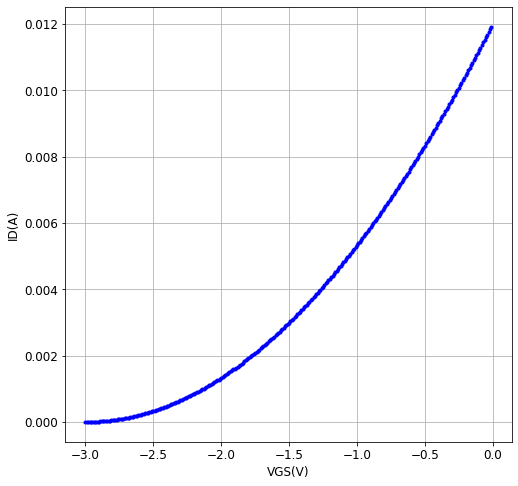

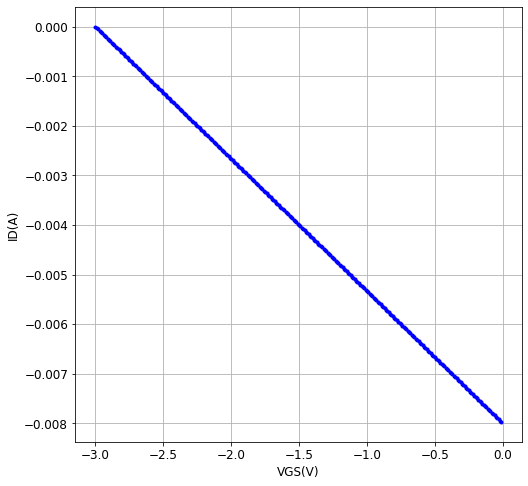

In [88]:
def idi(v, Idss = 12e-3, vc=-3):
    i =  0.              if (v < vc)                else 0
    i = Idss*(1-v/vc)**2 if (v >= vc  and v < 0)    else i
    i = Idss             if (v >= 0 )               else i
    return i


def gmi(v, Idss = 12e-3, vc=-3):
    i =  0.              if (v < vc)                else 0
    i = 2*Idss/vc*(1-v/vc) if (v >= vc  and v < 0)    else i
    i = Idss             if (v >= 0 )               else i
    return i


Idss = 12e-3
vc   = -3

vgsa = np.arange(-3,0,0.01)
idsa = np.array([idi(vgs, Idss, vc) for vgs in vgsa])
gma = np.array([gmi(vgs, Idss, vc) for vgs in vgsa])


plt.plot(vgsa,idsa,'b.')
#plt.axis([-5, 15, -1, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()


plt.plot(vgsa,gma,'b.')
#plt.axis([-5, 15, -1, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

In [116]:
#Calculos 
#parametros de la senal 
fol   =  11e6 #Hz
frf   =  10e6

#tiempo de un periodo de la modulante
# se que la menor frecuencia que quiero en el espectro es 
fm  = 0.5e6
Tm  = 1/fm

#Muestreo (Recordatorio : Nysquist)
fmax= 22e6
# muestreo (mayor a dos)
ns  =  24   
fs  =  ns*(fmax)
ds  = 1/(fs) ##delta time para el calculo de los armonicos


time = np.arange(0,Tm,ds)   

Vpol= 1.5

vol = Vpol +1   * np.cos(2*np.pi*fol*time)

vrf = 10e-3* np.cos(2*np.pi*frf*time)

vgst = vrf - vol

Idss = 12e-3

vc   = -3

idst = np.array([idi(vgs, Idss, vc) for vgs in vgst])




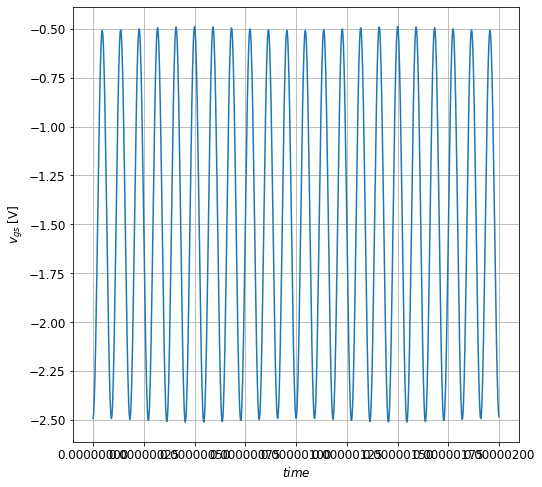

In [117]:
plt.plot(time, vgst)
plt.ylabel('$v_{gs}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()



/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


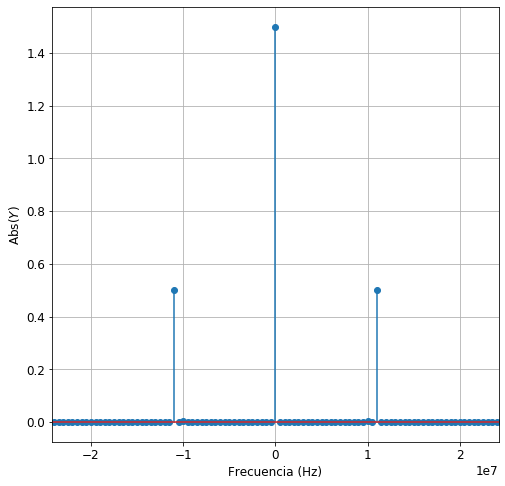

In [118]:
# FFT
Fvgs = fft(vgst) / len(vgst)  # Normalizada

frq = fftfreq(len(vgst), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fvgs) )  

plt.xlim(-(fol)*2.2,(fol)*2.2)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

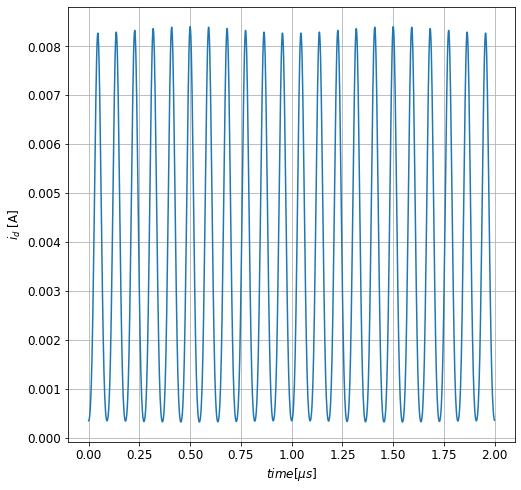

In [119]:
plt.plot(time/1e-6, idst)
plt.ylabel('$i_{d}$ [A]')
plt.xlabel('${time} [\mu s]$')

plt.grid()
plt.show()



/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


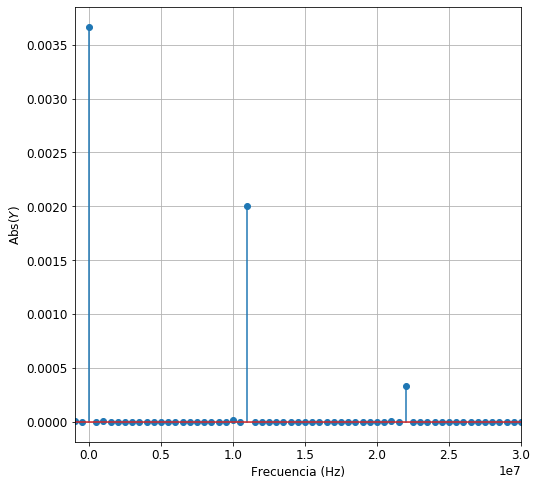

In [120]:
# FFT
Fids = fft(idst) / len(idst)  # Normalizada

frq = fftfreq(len(idst), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fids))  

plt.xlim(-1e6,30e6)
#plt.ylim(0,100e-6)

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

In [133]:
def FiltroQ(i, f, R, Q, fo):
    if f != 0: v =i*R/(1+1j*Q*(f/fo-fo/f))
    else     : v =12
    return v

Q =20
R =50e3
fo = 1e6


Fvdt = [FiltroQ(Fids[i], fq, R, Q, fo) for i, fq in enumerate(frq)]
        

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


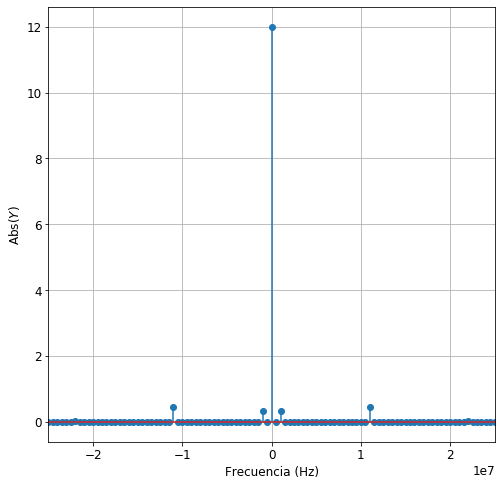

In [134]:
plt.stem(frq, np.abs(Fvdt))  

plt.xlim(-25e6,25e6)



plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

In [135]:
# FFT
Tvdt = ifft(Fvdt)   # Normalizada



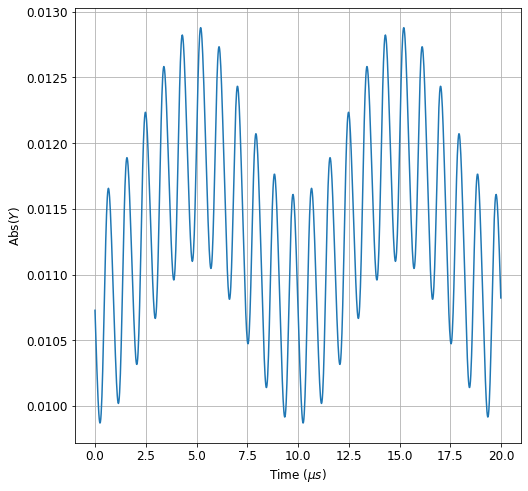

In [136]:
plt.plot(time/.1e-6, abs(Tvdt) )  

plt.xlabel('Time ($\mu s$)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()